In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Probability distribution

Normal Distribution
$$
    p(x|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\bigg\{\bigg\}
$$

$$
    F(X < x|\mu, \sigma) = \int_{-\infty}^x dx \frac{1}{\sigma\sqrt{2\pi}} \exp\bigg\{\bigg\}
$$

# Expectations and Simulation with Pseudo Random Sampling

## Expectation
- A function $f$ is called a linear operator if $f(ax+by) = af(x) + bf(y)$ for all $x$ and $y$ and constants $a$ and $b$
- Expectation
\begin{align}
        \mathbb{E}[f(X)] & = \sum_i p(x_i) f(x_i) \quad\mbox{PMF}\\
                         & = \int_\Omega dx p(x) f(x) \quad\mbox{PDF}
\end{align}
-  Expection is a linear operator:

\begin{align}
        \mathbb{E}[aX + bY] & = \sum_{x,y}(ax + by)p_{X,Y}(x,y) \\
                            & = \sum_x \sum_y (ax p_{X,Y}(x, y)) + \sum_x \sum_y(by p_{X,Y}(x,y))\\
                            & = \sum_x \left(
                              ax \sum_y (p_{X,Y}(x, y))
                            \right)
                             +
                            \sum_y
                            \left(
                              by \sum_x p_{X,Y}(x,y)
                            \right) \\
                            & = a\mathbb{E}[X] + b\mathbb{E}[Y]
\end{align}


- Examples
$$
    \mathbb{E}[X] = \int_\Omega dx p(x) x \\
    \mathbb{E}[X^2] = \int_\Omega dx p(x) x^2
$$
- Useful Formula.
$$
    \mathbb{E}[X] = \mu \\
    \mathbb{E}[ a X + b ] = a \mathbb{E}[X] + b
$$
$$
    \mathbb{V}[X] = \mathbb{E}[ (X-\mu)^2 ] = \sigma^2 = \mathbb{E}[X^2] - \mu^2 \\
    \mathbb{V}[aX+b] = \mathbb{E}[ (aX-a\mu)^2 ] = a^2\mathbb{E}[ (X-\mu)^2 ] =a^2 \mathbb{V}[X]
$$

## Simulation
Calculation with samples.

In [3]:
n_samples = 100000

In [4]:
rs = stats.norm.rvs(loc=0, scale=1, size=(n_samples))

In [5]:
# expection
mean = rs.sum() / n_samples
# variance = mean of squared deviation from the mean
var = np.sum((rs - mean)**2) / n_samples
# standard deviation = sqrt of var
std = np.sqrt(var)

In [6]:
print(mean, std)

-0.0041186594960645195 0.99812850236238


Now a random variable which is equivalent to the affinely transformed version.

In [7]:
# X_2 = X * 2 + 1
rs2 = stats.norm.rvs(loc=5, scale=2, size=n_samples)

In [8]:
# expection
mean2 = rs2.sum() / n_samples
# variance = mean of squared deviation from the mean
var2 = np.sum((rs2 - mean2)**2) / n_samples
# standard deviation = sqrt of var
std2 = np.sqrt(var2)

In [9]:
print(mean2, std2)

5.00503826026618 1.9950289679632982


The result may also be obtained by simple affine transformation:

In [10]:
# apply the formula to get the mean and std for X_2
mean22 = 2*mean + 5
var22 = 2**2 * var2
std22 = np.sqrt(var22)
print(mean22, std22)

4.991762681007871 3.9900579359265964


- The difference is caused by the computation from samples.
- By increasing the number of samples, the difference do decrease. 
- With infinitely many samples, no difference will occur.

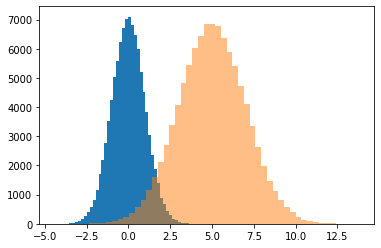

In [11]:
plt.hist(rs, bins=50);
plt.hist(rs2, alpha=.5, bins=50);

## Sum of Random Variables
Let's think about a new random variable $Y$:
\begin{align}
    Y & = X_1 + X_2 
\end{align}
where $X_i$s are independent random variables.

Its expections are:
\begin{align}
    \mathbb{E}[Y] & = \mathbb{E}[X_1] + \mathbb{E}[X_2] \quad \mbox{so},\quad \mu_Y = \mu_{X_1} + \mu_{X_2}\\
    \mathbb{V}[Y] & = \mathbb{E}[(Y-\mu_Y)^2] \quad \mbox(show)\\
                  & = \mathbb{V}[X_1] + \mathbb{V}[X_2] \\
    Std(Y) &= \sqrt{Std(X_1)^2 + Std(X_2)^2 }
\end{align}

In [12]:
n_samples = 1000000

In [13]:
X1 = stats.norm.rvs(loc= 3, scale=2, size=n_samples)
X2 = stats.norm.rvs(loc= 7, scale=2, size=n_samples)

In [14]:
Y = X1 + X2

In [15]:
X1.mean(), X2.mean(), Y.mean()

(3.0017181794002803, 6.998118622239913, 9.999836801640194)

In [16]:
X1.std(), X2.std(), Y.std(), np.sqrt(X1.std()**2 + X2.std()**2)

(2.0029661281499505, 2.001399310819688, 2.8336501679484756, 2.8315141729939346)

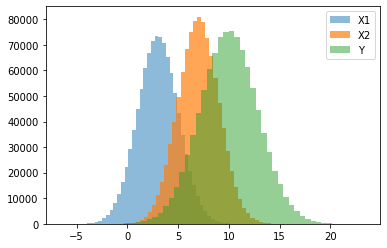

In [17]:
bins=50
plt.hist(X1, bins=bins, alpha=.5, label='X1');
plt.hist(X2, alpha=.7, bins=bins, label='X2');
plt.hist(Y, alpha=.5, bins=bins, label='Y');
plt.legend();

## Difference of Random Variables
Let's think about a new random variable $Y$:
\begin{align}
    Y & = X_1 - X_2 
\end{align}
where $X_i$s are independent random variables.

Its expections are:
\begin{align}
    \mathbb{E}[Y] & = \mathbb{E}[X_1] - \mathbb{E}[X_2] \quad \mbox{so},\quad \mu_Y = \mu_{X_1} - \mu_{X_2}\\
    \mathbb{V}[Y] & = \mathbb{E}[(Y-\mu_Y)^2] \quad \mbox(show)\\
                  & = \mathbb{V}[X_1] + \mathbb{V}[X_2] \\
    Std(Y) &= \sqrt{Std(X_1)^2 + Std(X_2)^2 } \quad\quad\mbox{the same!}
\end{align}

In [18]:
n_samples = 1000000

In [19]:
X1 = stats.norm.rvs(loc=-3, scale=2, size=n_samples)
X2 = stats.norm.rvs(loc= 3, scale=2, size=n_samples)

In [20]:
Y = X1 - X2

In [21]:
X1.mean(), X2.mean(), Y.mean()

(-3.0004627392562346, 2.9992724842457377, -5.999735223501973)

In [22]:
X1.std(), X2.std(), Y.std(), np.sqrt(X1.std()**2 + X2.std()**2)

(2.0029532652461235, 1.9993606218480144, 2.832962650048061, 2.8300644301776217)

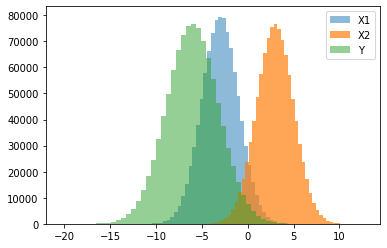

In [23]:
bins=50
plt.hist(X1, bins=bins, alpha=.5, label='X1');
plt.hist(X2, alpha=.7, bins=bins, label='X2');
plt.hist(Y, alpha=.5, bins=bins, label='Y');
plt.legend();

Let's try it with two **uniform distributions**.

```scipy.stats.uniform``:
In the standard form, the distribution is uniform on `[0, 1]`. Using the parameters `loc` and `scale`, one obtains the uniform distribution on `[loc, loc + scale]`.

In [25]:
X1 = stats.uniform.rvs(0, 2, size=n_samples)
X2 = stats.uniform.rvs(loc=4, scale=2, size=n_samples)

In [26]:
Y = X1 - X2

In [27]:
X1.mean(), X2.mean(), Y.mean()

(0.9997590167543522, 5.000529969322681, -4.000770952568331)

In [28]:
X1.std(), X2.std(), Y.std(), np.sqrt(X1.std()**2 + X2.std()**2)

(0.5772820338986288,
 0.5775825663574188,
 0.8162785518640746,
 0.8166126178440789)

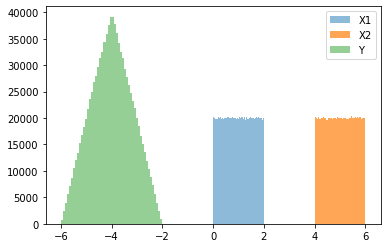

In [29]:
bins=50
plt.hist(X1, bins=bins, alpha=.5, label='X1');
plt.hist(X2, alpha=.7, bins=bins, label='X2');
plt.hist(Y, alpha=.5, bins=bins, label='Y');
plt.legend();

Implications:
- The difference is normal if $X_1$ and $X_2$ is normals.

## Mean of Random Variables
Let's think about a new random variable $Y$:
\begin{align}
    Y & = \frac{1}{n}\sum_i X_i
\end{align}
where $X_i$s are independent identically distributed (iid) random variables with mean $\mu$ and std $\sigma$.

Its expections are:
\begin{align}
    \mathbb{E}[Y] & = \frac{1}{n}\sum_i \mathbb{E}[X_i] = \mu\\
    \mathbb{V}[Y] & = \mathbb{V}\bigg[\frac{1}{n}\sum_i X_i\bigg] \\
                  & = \frac{1}{n^2}\mathbb{V}\bigg[\sum_i X_i\bigg] \\
                  & = \frac{1}{n^2}\sum_i\mathbb{V}\big[X_i\big] \quad\mbox{independence, uncorrelated}\\
                  & = \frac{1}{n^2}\sum_i \sigma^2 \\
                  & = \frac{1}{n} \sigma^2 \\
    Std(Y) &= \frac{\sigma}{\sqrt{n}}   \quad \mbox{called 'standard error'}
\end{align}
- Implication:
    - $Y$ is a mean estimator. It is a function that tries to estimate the mean of the distribution of r.v. $X$.
    - measure as many $X$'s as possible, and compute its mean $Y$.
    - the expectation of $Y$ approaches to the true mean $\mu$ in the limit.
    - the standard deviation of $Y$ approaches to 0.
    - the std of $Y$ is actually the error of the mean estimator $Y$. So it is called the **standard error** (SE).

In [30]:
n_samples = 10000
std = 1

In [31]:
n = 10
X_s = np.array([stats.norm.rvs(loc=0, scale=std, size=n) for _ in range(n_samples)])
X_s.shape

(10000, 10)

In [32]:
Y_samples = X_s.sum(axis=1) / n   # 
Y_samples.shape

(10000,)

In [33]:
Y_samples.mean(),  std/np.sqrt(n), Y_samples.std(), 

(0.00272254271397823, 0.31622776601683794, 0.31618102212222055)

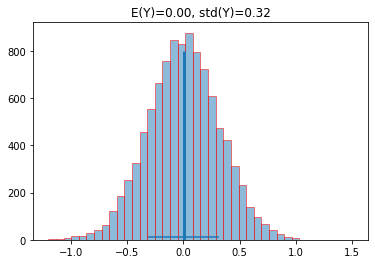

In [34]:
plt.vlines(x=Y_samples.mean(), ymin=0, ymax=800, linewidth=3)
plt.hlines(y=10, xmin=Y_samples.mean() - Y_samples.std(), xmax=Y_samples.mean()+Y_samples.std())
plt.title(f'E(Y)={Y_samples.mean():.2f}, std(Y)={Y_samples.std():.2f}')
plt.hist(Y_samples, bins=40, alpha=.5, edgecolor='red');

If the number of samples gets larger, the standard error gets smaller.

In [39]:
n = 100
X_s = np.array([stats.norm.rvs(loc=0, scale=std, size=n) for _ in range(n_samples)])
X_s.shape

(10000, 100)

In [40]:
Y_samples = X_s.sum(axis=1) / n   # 
Y_samples.shape

(10000,)

In [41]:
Y_samples.mean(),  std/np.sqrt(n), Y_samples.std(), 

(-0.0018025532211166145, 0.1, 0.0993620995998915)

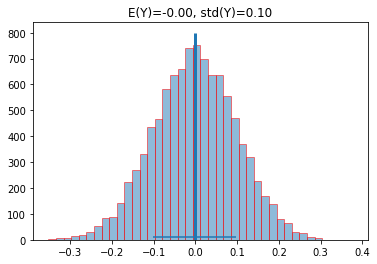

In [42]:
plt.vlines(x=Y_samples.mean(), ymin=0, ymax=800, linewidth=3)
plt.hlines(y=10, xmin=Y_samples.mean() - Y_samples.std(), xmax=Y_samples.mean()+Y_samples.std())
plt.title(f'E(Y)={Y_samples.mean():.2f}, std(Y)={Y_samples.std():.2f}')
plt.hist(Y_samples, bins=40, alpha=.5, edgecolor='red');

In [92]:
# Sampling from Uniform distriubtion.
n = 100
X_s = np.array([stats.uniform.rvs(size=n) for _ in range(n_samples)])
Y_samples = X_s.sum(axis=1) / n
print(Y_samples.mean(), Y_samples.std(), stats.uniform.std()/np.sqrt(n))

0.49972638195649005 0.02909734310473408 0.028867513459481287


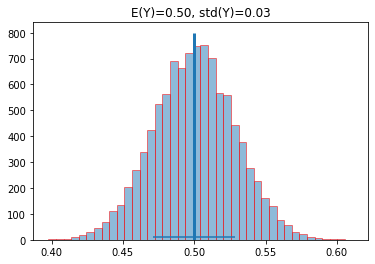

In [91]:
plt.vlines(x=Y_samples.mean(), ymin=0, ymax=800, linewidth=3)
plt.hlines(y=10, xmin=Y_samples.mean() - Y_samples.std(), xmax=Y_samples.mean()+Y_samples.std())
plt.title(f'E(Y)={Y_samples.mean():.2f}, std(Y)={Y_samples.std():.2f}')
plt.hist(Y_samples, bins=40, alpha=.5, edgecolor='red');

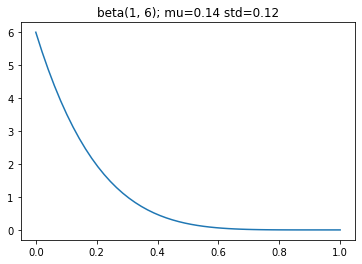

In [102]:
# sampling from non-symmetric distribution
dist = stats.beta(1,6)
#
x = np.linspace(0,1,50)
plt.plot(x, dist.pdf(x));
plt.title(f'beta(1, 6); mu={dist.mean():.2f} std={dist.std():.2f}');

In [104]:
# Sampling from Uniform distriubtion.
n = 100
X_s = np.array([dist.rvs(size=n) for _ in range(n_samples)])
Y_samples = X_s.sum(axis=1) / n
print(Y_samples.mean(), Y_samples.std(), dist.std()/np.sqrt(n))

0.1425878826121909 0.01207242465717272 0.012371791482634838


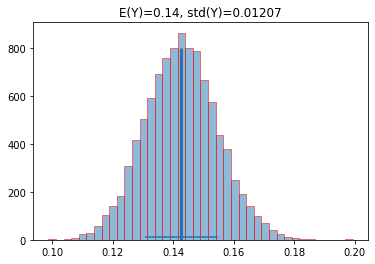

In [106]:
plt.vlines(x=Y_samples.mean(), ymin=0, ymax=800, linewidth=3)
plt.hlines(y=10, xmin=Y_samples.mean() - Y_samples.std(), xmax=Y_samples.mean()+Y_samples.std())
plt.title(f'E(Y)={Y_samples.mean():.2f}, std(Y)={Y_samples.std():.5f}')
plt.hist(Y_samples, bins=40, alpha=.5, edgecolor='red');

---
Now, let's think about the situation when you have only one set of samples $S = \{x_i, i = 1, ..., n\}$, $x_i \sim p(x)$, where $p(x)$ is a probabilty distribution. This is a practical case.

- The sample mean is $Y = \sum x_i / n$. This is an estimate of the mean of $X$ or $\mathbb{E}(X)$.
- The sample standard deviation of $S$ is $s = std(S)$. It is an estimate of the standard deviation $\sigma$ of $X$.
- The sample standard error $s/\sqrt{n}$ is an estimate of the standard error $\sigma/\sqrt{n}$.

In [89]:
# Normal distribution
n = 100
normal = stats.norm
print(f'normal(0,1): mu={normal.mean()}, std={normal.std()}')
S = normal.rvs(0, 1, size=n)
Y = S.mean()
std = S.std()
se = S.std() / np.sqrt(n)
print(f'Y: {Y}, std: {std}, se: {se}')

normal(0,1): mu=0.0, std=1.0
Y: -0.06552258444320802, std: 0.9020082021229735, se: 0.09020082021229735


In [88]:
# Uniform distribution
uniform = stats.uniform
print(f'uniform: mu={uniform.mean()}, std={uniform.std()}')
n = 100
S = uniform.rvs(0, 1, size=n)
Y = S.mean()
std = S.std()
se = S.std() / np.sqrt(n)
print(f'Y: {Y}, std: {std}, se: {se}')

uniform: mu=0.5, std=0.28867513459481287
Y: 0.5059035585890385, std: 0.2940806743986711, se: 0.029408067439867108


jupyter nbconvert rv_n_distribution.ipynb --to webpdf --HTMLExporter.theme=dark --allow-chromium-download --execute

https://blog.jupyter.org/the-templating-system-of-nbconvert-6-47ea781eacd2